## Central Limit Theorem

---

Normality underlies many of the inferential techniques that we use in data science.

Consider the random variable $X$. We can take a sample from this population of size $n$ and find the mean of that sample. Let's call this sample mean $x_1$. We can take another sample from this population, also of size $n$, and find the mean of that sample. Let's call this sample mean $x_1$. We can do this over and over until we've calculated the mean of every possible sample of size $n$. If we plotted every sample mean on a histogram, we get another distribution called "the sampling distribution of $\bar{X}$."

**This distribution, the sampling distribution of $\bar{X}$, is Normally distributed even if the distribution of $X$ is not.** (That is, unless some rare conditions are violated).

We can formally define [the central limit theorm](http://homepages.math.uic.edu/~bpower6/stat101/Sampling%20Distributions.pdf) like so:

> In probability theory, the central limit theorem states that, when independent random variables are added, their sum tends toward a normal distribution (commonly known as a bell curve), even if the original variables themselves are not normally distributed. In more precise terms, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables — each with a well-defined (finite) expected value and finite variance — will be approximately normally distributed, regardless of the underlying distribution.

Some properties that arise from the central limit theorem include:

> If $X ~ N(\mu,\sigma)$, then $\bar{X}$ is exactly $N(\mu,\frac{\sigma}{\sqrt{n}})$

> If $X$ is not normally distributed, then $\bar{X}$ is approximately $N(\mu,\frac{\sigma}{\sqrt{n}})$ if the sample size $n$ is at least 30. As $n$ increases, $\bar{X}$ becomes asymptotically normally distributed.

> If $\bar{X}$ is normally distributed, then we can use inferential methods that rely on our sample mean, $\bar{x}$

<a id='additional-resources'></a>

#### Additional resources

---

http://blog.vctr.me/posts/central-limit-theorem.html

http://www.usablestats.com/lessons/central_limit

http://blog.minitab.com/blog/michelle-paret/explaining-the-central-limit-theorem-with-bunnies-and-dragons-v2


In the next few notebooks, we are going to do some Unsupervised Exploration of the `customer` table in our Database.

> What does a data scientist do? PCA on the `customer` table. - Joshua Cook

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import display

customers = pd.read_csv('Wholesale_customers_data.csv')
customers.Region = customers.Region.astype('category')
customers.Channel = customers.Channel.astype('category')
customer_features = customers.select_dtypes(exclude = ['category'])

In [5]:
from scipy.stats import skew

In [6]:
skew(customer_features)

array([ 2.55258269,  4.03992212,  3.57518722,  5.88782573,  3.61945758,
       11.11353365])

In [7]:
import random 

random.sample(range(10), 2)

[4, 6]

In [8]:
stats = customer_features.describe().T
stats['skew'] = skew(customer_features)
stats

,count,mean,std,min,25%,50%,75%,max,skew
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534


### Sampling the Dataset 

In this notebook, we begin to explore the `customer` table by sampling the table. First, let's sample three random points and examine them. 

In [9]:
np.random.seed(42)

In [10]:
sample = customer_features.sample(3)

In [11]:
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
265,5909,23527,13699,10155,830,3636
78,10766,1175,2067,2096,301,167
347,27380,7184,12311,2809,4621,1022


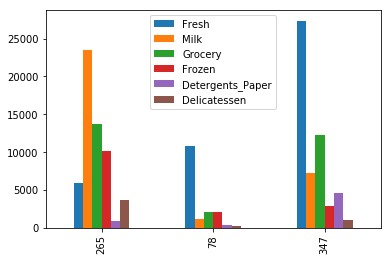

In [13]:
sample.plot(kind='bar')

In [14]:
stats

,count,mean,std,min,25%,50%,75%,max,skew
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534


### Sampling for a Statistical Description

We are able to take the mean and standard deviation of the data, but what if we want to visualize it? 

Of course, this dataset is small, but we might want techniques that work even when the dataset is very large.

Let's start by looking at 1% of the data. 

In [15]:
sample_1pct_1 = customer_features.sample(5)

In [16]:
sample_1pct_1.mean()

Fresh               14123.6
Milk                 5801.0
Grocery              5475.8
Frozen               2812.6
Detergents_Paper     1097.8
Delicatessen         1987.6
dtype: float64

#### How does this compare to the actual mean?

In [24]:
sample_1pct_1.mean().index

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [25]:
stats['mean'].index

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [17]:
sample_1pct_1.mean() - stats['mean']

Fresh               2123.302273
Milk                   4.734091
Grocery            -2475.477273
Frozen              -259.331818
Detergents_Paper   -1783.693182
Delicatessen         462.729545
dtype: float64

Let's think about this in terms of percent error.

In [18]:
(sample_1pct_1.mean() - stats['mean'])/stats['mean']

Fresh               0.176937
Milk                0.000817
Grocery            -0.311331
Frozen             -0.084420
Detergents_Paper   -0.619017
Delicatessen        0.303455
dtype: float64

#### How does it do?


#### Let's try it again

In [26]:
sample_1pct_2 = customer_features.sample(5)

In [27]:
sample_1pct_2.mean() - stats['mean']

Fresh              -4642.897727
Milk               -2076.265909
Grocery            -1499.477273
Frozen              -295.131818
Detergents_Paper    -190.693182
Delicatessen        -253.670455
dtype: float64

In [28]:
(sample_1pct_2.mean() - stats['mean'])/stats['mean']

Fresh              -0.386899
Milk               -0.358207
Grocery            -0.188583
Frozen             -0.096074
Detergents_Paper   -0.066179
Delicatessen       -0.166355
dtype: float64

#### How does it do?

#### Repeatedly Sample

Let's do it 10 times.

In [30]:
sample_means = []
print(len(sample_means))

for _ in range(10):
    sample_means.append(customer_features.sample(5).mean())
    print(len(sample_means))

0
1
2
3
4
5
6
7
8
9
10


In [32]:
sample_means[3]

Fresh               2899.6
Milk                4005.6
Grocery             5613.8
Frozen              1759.4
Detergents_Paper    1869.4
Delicatessen         942.2
dtype: float64

In [33]:
sample_means = np.array(sample_means)

In [34]:
sample_means.shape

(10, 6)

In [35]:
(sample_means.mean(axis=0)-stats['mean'])/stats['mean']

Fresh              -0.046157
Milk                0.164446
Grocery            -0.030915
Frozen             -0.221558
Detergents_Paper   -0.017433
Delicatessen        0.301999
Name: mean, dtype: float64

And 50 times.

In [36]:
sample_means = []
for _ in range(50):
    sample_means.append(customer_features.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

Fresh              -0.010757
Milk               -0.040093
Grocery            -0.014593
Frozen              0.098240
Detergents_Paper   -0.032894
Delicatessen       -0.003693
dtype: float64

And 100 times.

In [37]:
sample_means = []
for _ in range(100):
    sample_means.append(customer_features.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

Fresh              -0.053831
Milk               -0.015742
Grocery            -0.019651
Frozen              0.006763
Detergents_Paper   -0.033783
Delicatessen        0.035196
dtype: float64

#### What do we notice?

#### Take a larger sample

Totally different. Which makes sense ... we're only taking 1% of the data!

What if we take a sample of 10% of the data?

In [38]:
sample_10pct_1 = customer_features.sample(44)
(sample_10pct_1.mean() - stats['mean'])/stats['mean']

Fresh              -0.015301
Milk               -0.251309
Grocery            -0.206440
Frozen              0.037177
Detergents_Paper   -0.223469
Delicatessen       -0.223749
dtype: float64

#### Is this sample good enough for plotting?

https://stats.stackexchange.com/questions/2541/is-there-a-reference-that-suggest-using-30-as-a-large-enough-sample-size

In [ ]:
sns.pairplot(sample_10pct_1, kind='reg')